# Web Crawler
## What is Web Crawler?

* Web crawler is a software program which browses the World Wide Web in a methodical and automated manner.
* Web crawler collects documents by recursively fetching links from a set of starting pages.
* Search engines like Google crawls web pages and create index on them, so we can search these web pages.
* Other uses of web crawlers:
 * Mirror sites
 * Monitor sites when they change the content
 * Special index for multimedia contents, such as image and video

## When Designing a Web Crawler
* Are we crwaling text only, or also downloading media data like image, video?
* Protocols, HTTP, FTP or others?
* How many pages we want to download? What would be the size URL database?

### Storage Estimation
Assume that we want to download all web pages (1.9 billion pages as of 2016), let's round to 2 billion.
> 2 billion pages/ (4 weeks * 7 days * 86400 second) = 827 pages/second

Storage for web pages & for URL & metadata
> 2 billion pages * 1 MB/page = 2 petabytes

### Step by Step

https://en.wikipedia.org/wiki/Python_(programming_language)

1. Pick a URL from the unvisited URL list.
2. Determine the IP Address of its host-name.
3. Establish a connection to the host to download the corresponding document.
4. Parse the document contents to look for new URLs.
5. Add the new URLs to the list of unvisited URLs.
6. Process the downloaded document, e.g., store it or index its contents, etc.
7. Go back to step 1

### Web Crawler Strategy
* Breadth First Search(BFS)
* Depth First Search(DFS) - can be utilized to reduce networking overhead
* Path Asending Search
 * With URL of http://webdomain.com/a/b/page.html, it will attemp to crawl /, /a, /a/b, /a/b/page.html

### Architecture of Web Crawler
* HTML Fetcher: To download a web page from server
* Extractor: To extract links from HTML documents
* Datastore: To store retrieved pages, URLs, and other metadata.
* Duplicate Remover: To make sure the same content is not extracted twice unintentionally.
* URL frontier: To store the list of URLs to download and also prioritize which URLs should be crawled first.

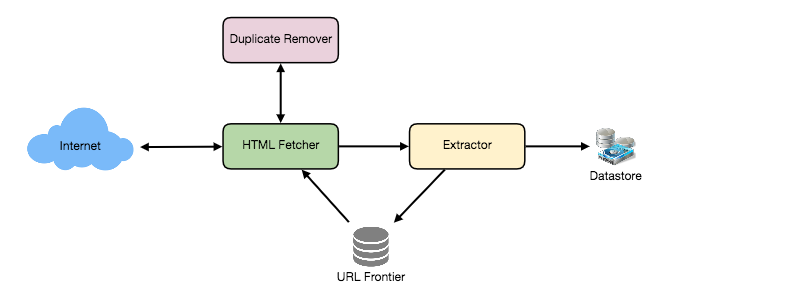

In [1]:
from IPython.display import Image
Image(filename='./image/1_web_crawler_architecture.png')

#### Client/Server Relationship

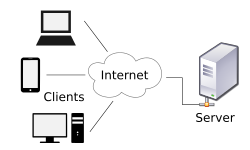

In [2]:
Image(filename='./image/1_Client-server-model.png', height = 600, width = 400)

### Detailed Component Design

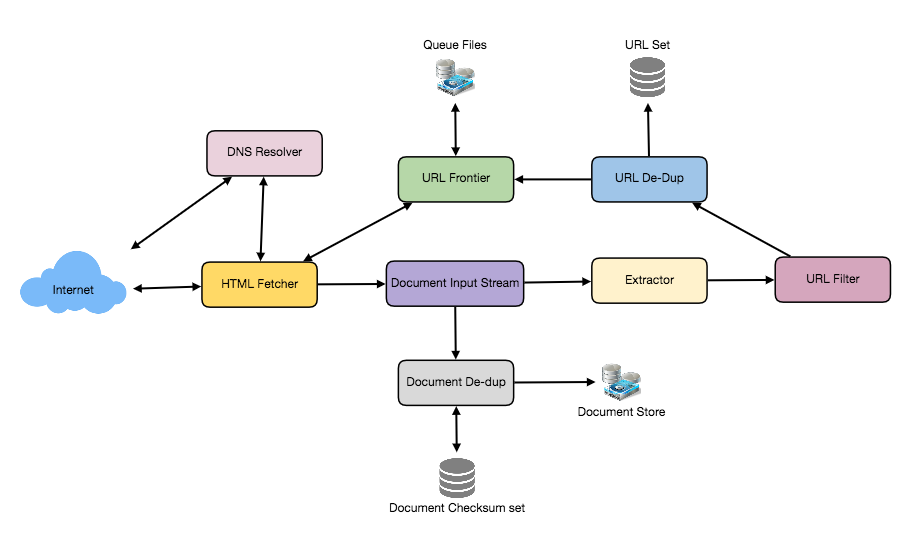

In [3]:
Image(filename='./image/1_web_crawler_architecture_detail.png')

#### Link Based Ranking Technique: PageRank

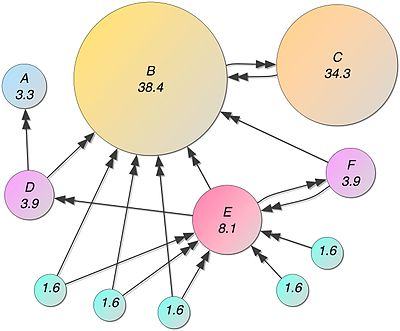

In [3]:
Image(filename='./image/2_PageRanks-Example.jpg')

### Web Crawler Implementation

#### requests lib - https://realpython.com/python-requests/

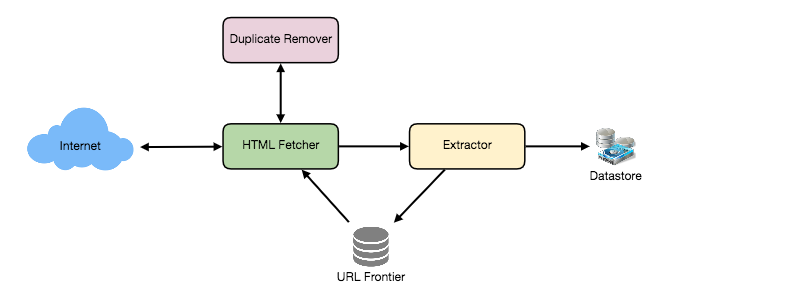

In [4]:
from IPython.display import Image
Image(filename='./image/1_web_crawler_architecture.png')

In [5]:
import requests
r = requests.get('http://en.wikipedia.org/wiki/Python_(programming_language)')
print(r.url)


https://en.wikipedia.org/wiki/Python_(programming_language)


In [21]:
print(r.content)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Python (programming language) - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Python_(programming_language)","wgTitle":"Python (programming language)","wgCurRevisionId":903808732,"wgRevisionId":903808732,"wgArticleId":23862,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","Articles with short description","Use dmy dates from August 2015","Articles containing potentially dated statements from March 2018","All articles containing potentially dated statements","Articles containing potentially dated statements from August 2016","Articles containing

In [22]:
print(r.text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Python (programming language) - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Python_(programming_language)","wgTitle":"Python (programming language)","wgCurRevisionId":903808732,"wgRevisionId":903808732,"wgArticleId":23862,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","Articles with short description","Use dmy dates from August 2015","Articles containing potentially dated statements from March 2018","All articles containing potentially dated statements","Articles containing potentially dated statements from August 2016","Articles containing potentia

In [25]:
r.headers

{'Date': 'Sun, 30 Jun 2019 07:34:04 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '73907', 'Connection': 'keep-alive', 'Server': 'mw1326.eqiad.wmnet', 'X-Content-Type-Options': 'nosniff', 'P3P': 'CP="This is not a P3P policy! See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'X-Powered-By': 'HHVM/3.18.6-dev', 'Content-language': 'en', 'Last-Modified': 'Fri, 28 Jun 2019 15:50:16 GMT', 'Backend-Timing': 'D=144096 t=1561737283973552', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding,Cookie,Authorization,X-Seven', 'X-Varnish': '3314452 1050142880, 769613701 775460800, 685357741 667324265, 950754006 823268744', 'Via': '1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1)', 'Age': '56486', 'X-Cache': 'cp1087 hit/3, cp2019 hit/1, cp4030 hit/6, cp4030 hit/28', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front"', 'Strict-Transport-Security': 'max-age=106384710; inc

### BeautifulSoup


#### Making the soup

In [ ]:
from bs4 import BeautifulSoup

import requests
r = requests.get('http://en.wikipedia.org/wiki/Python_(programming_language)')
print(r.url)

soup = BeautifulSoup(r.text)
print(soup.find_all('a')[1:10])


In [68]:
! python ./code/script1.py

https://en.wikipedia.org/wiki/Python_(programming_language)
/Library/Python/2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))
[<a href="/wiki/Wikipedia:Good_articles" title="This is a good article. Follow the link for more information."><img alt="This is a good article. Follow the link for more information." data-file-height="185" data-file-width="180" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/en/thumb/9/94/Symbol_support_vote.svg/19px-Symbol_support_vote.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/94/Symbol_supp

In [ ]:
import requests
r = requests.get('http://en.wikipedia.org/wiki/Python_(programming_language)')
print(r.url)

soup = BeautifulSoup(r.text)
links = []
for line in soup.find_all('a', href=True):
  links.append(line['href'])

print('\n'.join(links[1:10]))
print('\n'.join(links[-10:-1]))

In [72]:
! python ./code/script2.py

https://en.wikipedia.org/wiki/Python_(programming_language)
/Library/Python/2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))
#mw-head
#p-search
/wiki/Python_(disambiguation)
/wiki/File:Python_logo_and_wordmark.svg
/wiki/Programming_paradigm
/wiki/Multi-paradigm_programming_language
/wiki/Functional_programming
/wiki/Imperative_programming
/wiki/Object-oriented_programming
//www.wikimediafoundation.org/
https://foundation.wikimedia.org/wiki/Privacy_policy
/wiki/Wikipedia:About
/wiki/Wikipedia:General_disclaimer
//en.wikipedia.org/wiki/Wikipedia:Contact_u

### Link Cases
* #p-search
* /wiki/Python_(disambiguation)
* //en.m.wikipedia.org/w/index.php?title=Python_(programming_language)&mobileaction=toggle_view_mobile
* https://foundation.wikimedia.org/wiki/Privacy_policy